# Setup

In [1]:
import sys
import os
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))

if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

from src.tasks.embed_unsup import train_node2vec, plot_tsne, plot_umap
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

/Volumes/Crucial1TB/MyProjects/cora/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# Load Cora dataset
dataset = Planetoid(root="data/Cora", name="Cora", transform=NormalizeFeatures())
data = dataset[0]

# Train Node2Vec
emb = train_node2vec(data.edge_index, embedding_dim=128, walk_length=10, context_size=10, 
                     walks_per_node=10, num_negative_samples=2, p=1, q=2, epochs=200, lr=0.005, sparse=False)

Epoch 010, Loss: 121.3796
Epoch 020, Loss: 85.9147
Epoch 030, Loss: 62.0958
Epoch 040, Loss: 46.7440
Epoch 050, Loss: 36.6498
Epoch 060, Loss: 30.0177
Epoch 070, Loss: 25.7665
Epoch 080, Loss: 22.9270
Epoch 090, Loss: 21.2348
Epoch 100, Loss: 20.1250
Epoch 110, Loss: 19.4989
Epoch 120, Loss: 18.9658
Epoch 130, Loss: 18.6602
Epoch 140, Loss: 18.4376
Epoch 150, Loss: 18.2248
Epoch 160, Loss: 18.1188
Epoch 170, Loss: 18.0568
Epoch 180, Loss: 18.0042
Epoch 190, Loss: 17.9320
Epoch 200, Loss: 17.8609


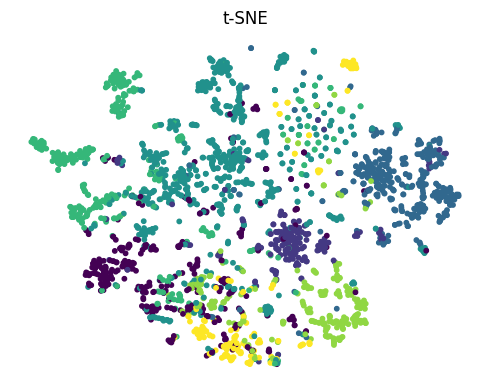

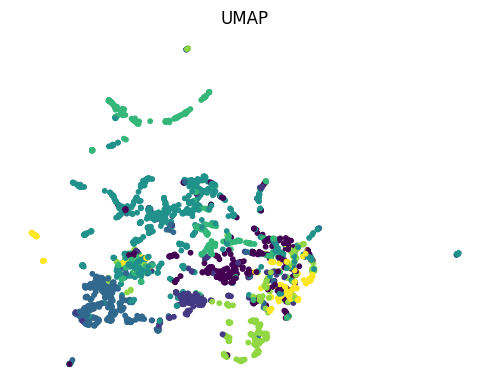

In [12]:
# Plot embeddings
plot_tsne(emb, data.y)
plot_umap(emb, data.y)